In [ ]:
!pip install pandas numpy matplotlib seaborn jupyter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [4]:
df = pd.read_csv("C:/Users/pujit/OneDrive/Desktop/Customer_churn_analysis/data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#As the TotalCharges is stored in the dataset as text we need to convert it into numeric data type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
churn_rate=df['Churn'].value_counts(normalize=True)*100
churn_rate

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

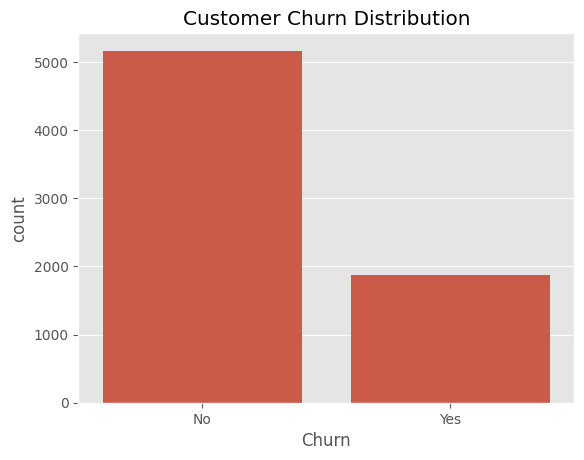

In [13]:
sns.countplot(data=df,x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

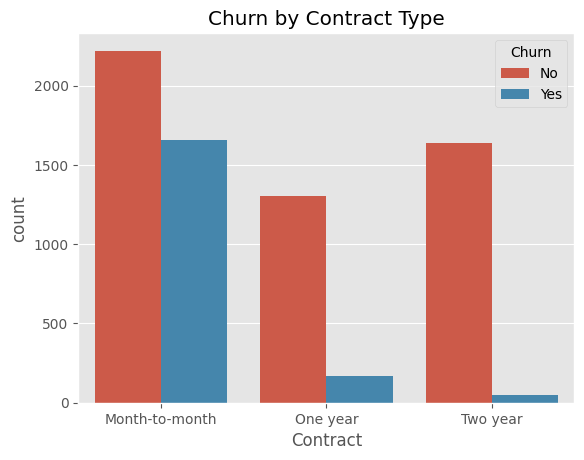

In [15]:
#Churn by Contract Type
sns.countplot(data=df,x='Contract',hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

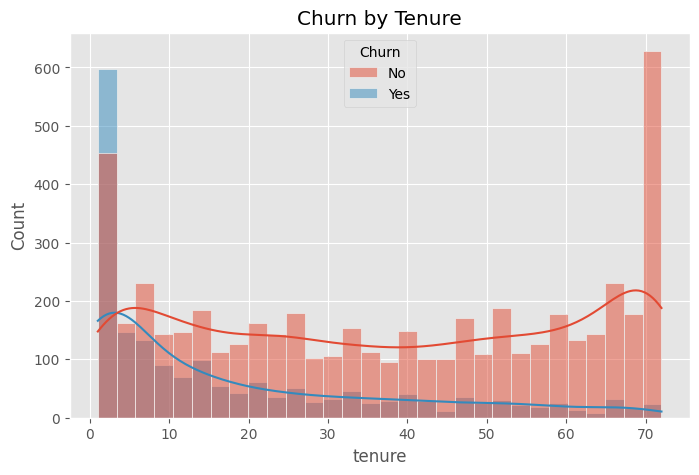

In [17]:
#Churn by Tenure
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='tenure',hue='Churn',bins=30,kde=True)
plt.title("Churn by Tenure")
plt.show()

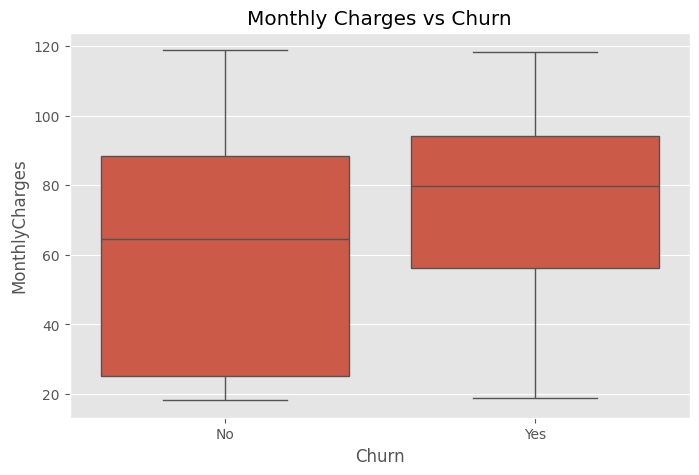

In [18]:
#Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

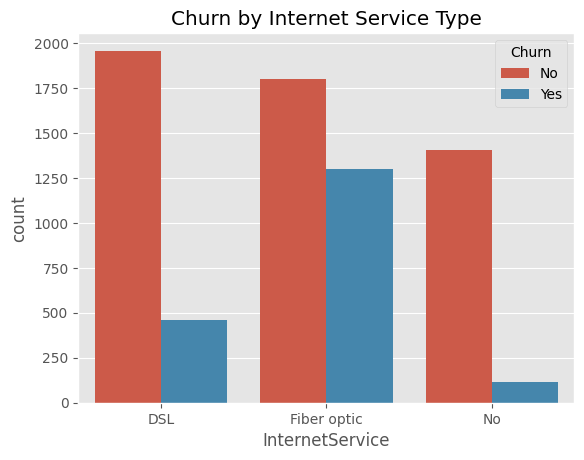

In [19]:
#Churn by Internet Service
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

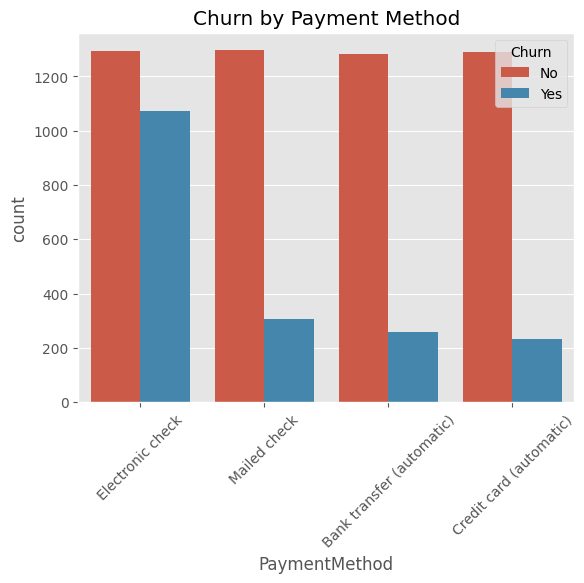

In [20]:
#Churn by Payment Method
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()

## Churn Analysis

### Key Insights
- The company is experiencing a **notable churn rate**, indicating a strong need for improved customer retention strategies.
- **Month-to-month contract customers** are the most likely to churn, showing that lack of long-term commitment is a major risk factor.
- Churn is highest among customers with **short tenure**, particularly within the first year of service.
- Customers with **higher monthly charges** tend to churn more, suggesting concerns around pricing or perceived value.
- **Fiber optic users** show higher churn compared to other service types, possibly due to higher costs or unmet expectations.
- Customers using **electronic check payments** exhibit the highest churn rates, indicating lower engagement or less automated billing behavior.


### Strategic Recommendations
1. **Increase long-term customer commitment**
   - Offer incentives for customers to switch from month-to-month to annual or two-year contracts.
   - Target high-risk customers with contract upgrade offers.

2. **Strengthen early customer engagement**
   - Implement onboarding programs for new customers.
   - Provide loyalty rewards or discounts during the first 6–12 months.

3. **Reassess pricing and value perception**
   - Review high-cost plans linked to higher churn.
   - Introduce bundled packages or personalized discounts.

4. **Focus on high-risk customer segments**
   - Identify customers with short tenure and high monthly charges.
   - Provide proactive retention offers and improved support.

5. **Encourage automated payment methods**
   - Promote auto-pay through incentives or discounts.
   - Reduce reliance on electronic check payments.

6. **Improve experience for fiber optic customers**
   - Enhance service reliability and support.
   - Offer loyalty programs or performance-based benefits.


In [22]:
df.to_csv("C:/Users/pujit/OneDrive/Desktop/Customer_churn_analysis/data/Telco-Customer-Churn.csv",index=False)